In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [9]:
start = '2010-01-01'
end = '2023-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.371568,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200


In [10]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [11]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-31,7.611786,7.619643,7.520000,7.526071,6.371568,352410800
1,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
3,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
4,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200


In [12]:
df= df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.611786,7.619643,7.520000,7.526071,352410800
1,7.622500,7.660714,7.585000,7.643214,493729600
2,7.664286,7.699643,7.616071,7.656429,601904800
3,7.656429,7.686786,7.526786,7.534643,552160000
4,7.562500,7.571429,7.466071,7.520714,477131200


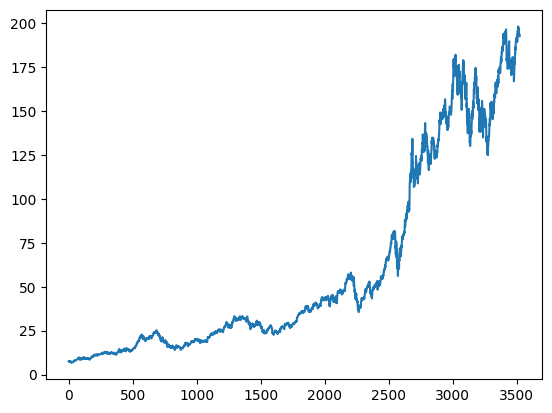

In [13]:
plt.plot(df.Close)

In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3518    181.768301
3519    181.787101
3520    181.898701
3521    182.046001
3522    182.173301
Name: Close, Length: 3523, dtype: float64

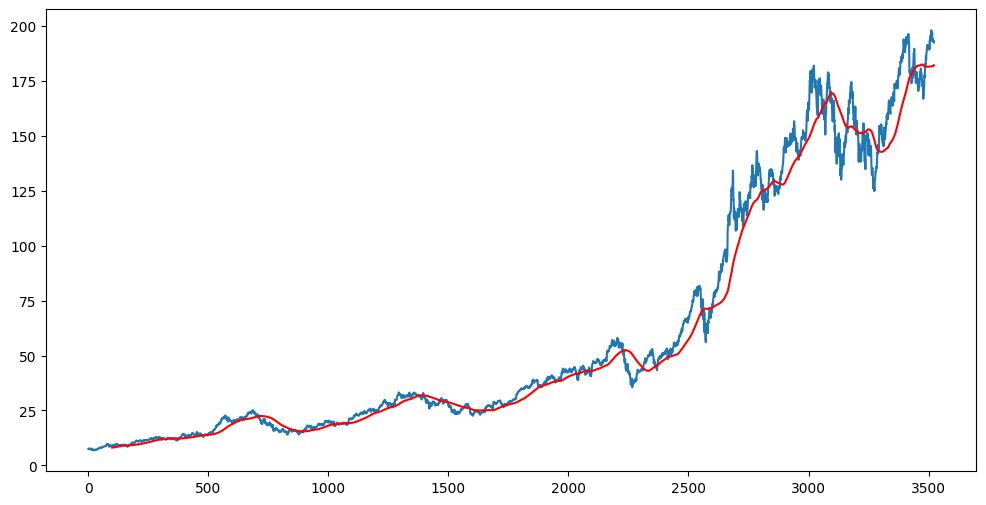

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3518    178.649100
3519    178.871851
3520    179.085250
3521    179.290201
3522    179.487900
Name: Close, Length: 3523, dtype: float64

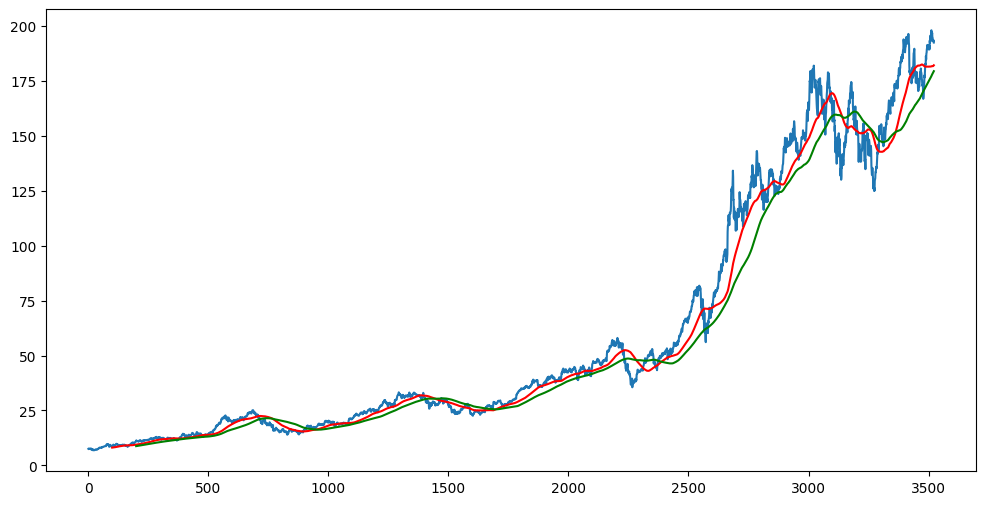

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [18]:
df.shape


(3523, 5)

In [19]:
#splitting data into training and testing

#training data with 70% values
#30% data is testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2466, 1)
(1057, 1)


In [20]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [21]:
data_testing.head()

,Close
2466,59.102501
2467,60.127499
2468,59.990002
2469,60.794998
2470,60.895000


In [22]:
from sklearn.preprocessing import MinMaxScaler

# Assuming data_training is your training data
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01278207],
       [0.01502647],
       [0.01527965],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [24]:
x_train = []
y_train =[] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(2366, 100, 1)

In [26]:
# ML Model

In [27]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units =50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units =60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units =80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units =120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [29]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
model.compile(optimizer= 'adam', loss= 'mean_squared_error', metrics=['accuracy'])
model.fit(x_train, y_train,epochs =50)


Epoch 1/50


74/74 [==============================] - 34s 303ms/step - loss: 0.0384 - accuracy: 4.2265e-04
Epoch 2/50
74/74 [==============================] - 22s 298ms/step - loss: 0.0079 - accuracy: 4.2265e-04
Epoch 3/50
74/74 [==============================] - 22s 291ms/step - loss: 0.0070 - accuracy: 4.2265e-04
Epoch 4/50
74/74 [==============================] - 22s 304ms/step - loss: 0.0072 - accuracy: 4.2265e-04
Epoch 5/50
74/74 [==============================] - 22s 295ms/step - loss: 0.0054 - accuracy: 4.2265e-04
Epoch 6/50
74/74 [==============================] - 21s 285ms/step - loss: 0.0062 - accuracy: 4.2265e-04
Epoch 7/50
74/74 [==============================] - 22s 298ms/step - loss: 0.0049 - accuracy: 4.2265e-04
Epoch 8/50
74/74 [==============================] - 22s 292ms/step - loss: 0.0049 - accuracy: 4.2265e-04
Epoch 9/50
74/74 [==============================] - 22s 292ms/step - loss: 0.0046 - accuracy: 4.2265e-04
Epoch 10/50
74/74 [==============================] -

In [31]:
model.save('keras_model.keras')

In [32]:
data_testing.head()

,Close
2466,59.102501
2467,60.127499
2468,59.990002
2469,60.794998
2470,60.895000


In [33]:
past_100_days = data_training.tail(100)

In [34]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [35]:
final_df.head()

,Close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [36]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [37]:
input_data.shape

(1157, 1)

In [38]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [39]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [40]:
# making predictions

y_predicted = model.predict(x_test)

34/34 [==============================] - 17s 156ms/step


In [41]:
y_predicted.shape

(1057, 1)

In [42]:
y_test

array([0.10193171, 0.10855379, 0.10766548, ..., 0.96795551, 0.97073361,
       0.96394998])

In [43]:
y_predicted

array([[0.18839984],
       [0.19014424],
       [0.19192992],
       ...,
       [0.913201  ],
       [0.9104438 ],
       [0.9070816 ]], dtype=float32)

In [44]:
scaler.scale_

array([0.00646057])

In [45]:
scale_factor = 1/0.02123255
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

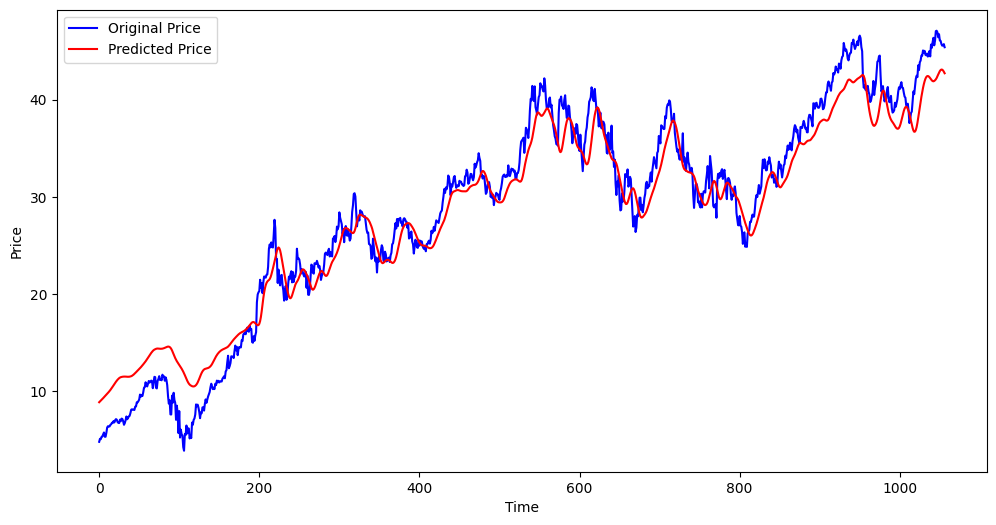

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [47]:
y_test.shape

(1057,)

In [48]:
y_predicted.shape 

(1057, 1)

In [49]:
import numpy as np
accuracy = np.mean(np.abs(y_predicted - y_test))
print(f"Accuracy: {accuracy}")

Accuracy: 11.450280400326275


In [1]:
mae = np.mean(np.abs(y_predicted - y_test))

# Calculate the range of the target variable
target_range = np.max(y_test) - np.min(y_test)

# Calculate the error percentage
error_percentage = (mae / target_range) * 100

print(f"Error Percentage: {error_percentage:.2f}%")


NameError: name 'np' is not defined

In [51]:
correct_predictions = np.sum(y_predicted == y_test)
total_predictions = len(y_test)

# Calculate accuracy percentage
accuracy_percentage = (correct_predictions / total_predictions) * 100

print(correct_predictions)

print(f"Accuracy Percentage: {accuracy_percentage:.2f}%")

0
Accuracy Percentage: 0.00%
